# Hyperparameter Optimization

In [39]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
import seaborn as sns

In [3]:
X, y = make_moons(n_samples=200, noise=0.3)

<AxesSubplot:>

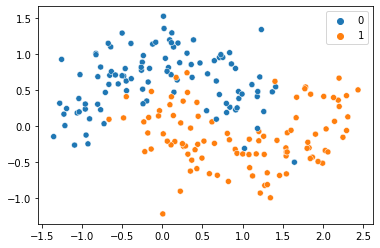

In [7]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

# Example: Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
#train test split

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y)

In [ ]:
#train a model

In [23]:
rf = RandomForestClassifier(max_depth=5, min_samples_split=10)

In [24]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=5, min_samples_split=10)

In [25]:
# evaluate
rf.score(xtrain, ytrain)

0.9533333333333334

## Grid Search

Instead of trying out different hyperparameters and -values manually, we can use a Grid Search, where we provide a dictionary with parameters that will be "searched" for the best model. 

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {'n_estimators': [5, 10, 25, 50],   # can also be e.g. range(5) 
              'max_depth' : [3, 5, 10, 20],
              'min_samples_split' : [2, 3, 5, 10]}

In [28]:
rf_opti = RandomForestClassifier()

In [29]:
gridsearch = GridSearchCV(rf_opti, param_grid, verbose=True)

In [30]:
gridsearch.fit(xtrain, ytrain)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [5, 10, 25, 50]},
             verbose=True)

In [31]:
gridsearch.best_params_

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}

In [35]:
gridsearch.best_score_

0.9266666666666667

In [32]:
rf_best = gridsearch.best_estimator_

In [33]:
rf_best.predict(xtrain)

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [38]:
rf_best.score(xtrain, ytrain)

0.9866666666666667

In [45]:
cross_val_score(rf_best, xtrain, ytrain)#.sum()/5

array([0.96666667, 1.        , 0.76666667, 0.96666667, 0.9       ])

In [46]:
rf_best.score(xtest, ytest)

0.88

## How does this work in a pipline? 
Syntax: Define the parameter-grid using the name of the step in the pipeline that you want to tune, then double underscores, then the name of parameter. 

In [47]:
pipe = Pipeline([
    ('polynomials', PolynomialFeatures(degree=2)),
    ('RandomForest', RandomForestClassifier())
])

In [1]:
param_grid = {'RandomForest__n_estimators': [5, 10, 25, 50],  
              'RandomForest__max_depth' : [3, 5, 10, 20],
              'RandomForest__min_samples_split' : [2, 5, 7]}

In [52]:
grid = GridSearchCV(pipe, param_grid)

In [53]:
%%time
grid.fit(xtrain, ytrain)

/usr/local/anaconda3/envs/std/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/anaconda3/envs/std/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/anaconda3/envs/std/lib/python3.6/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/anaconda3/envs/std/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "/usr/local/anaconda3/envs/std/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/anaconda3/envs/std/lib/python3.6/site-packages/joblib/parallel.p

CPU times: user 27.2 s, sys: 586 ms, total: 27.7 s
Wall time: 28.3 s


/usr/local/anaconda3/envs/std/lib/python3.6/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.86       0.86       0.89333333 0.89333333
 0.88       0.89333333 0.89333333 0.9        0.88666667 0.92
 0.9        0.89333333 0.86666667 0.89333333 0.89333333 0.89333333
 0.86       0.88       0.92       0.90666667 0.89333333 0.87333333
 0.90666667 0.91333333 0.86666667 0.86       0.9        0.89333333
 0.86       0.88666667 0.87333333 0.89333333        nan        nan
        nan        nan        nan        nan        nan        nan
 0.92       0.89333333 0.92       0.91333333 0.9        0.9
 0.90666667 0.91333333 0.89333333 0.91333333 0.89333333 0.91333333
 0.89333333 0.9        0.90666667 0.90666667 0.89333333 0.90666667
 0.91333333 0.92666667 0.9        0.93333333 0.90666667 0.90666667
 0.86       0.90666667 0.9        0.92       0.9066

GridSearchCV(estimator=Pipeline(steps=[('polynomials', PolynomialFeatures()),
                                       ('RandomForest',
                                        RandomForestClassifier())]),
             param_grid={'RandomForest__max_depth': [3, 5, 10, 20],
                         'RandomForest__min_samples_split': range(0, 10),
                         'RandomForest__n_estimators': [5, 10, 25, 50]})

In [1]:
# You can go as far with this as you like, e.g.:  (This example is mainly to show the syntax) 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, Lasso

pipe_regression = Pipeline([('scaler', StandardScaler()),
                            ('regressor', Ridge())])

param_grid = {'scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
            'regressor': [Ridge(), Lasso()],
            'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

NameError: name 'Pipeline' is not defined

In [ ]:
# RandomSearch -> A good option for huge datasets

In [ ]:
# DASK -> library for parallel computing